## Before starting do comment and UpVote if this notebook was helpful and interesting to read.. Thank You🙏

# <font color = 'blue'>Spam or Not 🤷‍♂️ using SpaCy (98% Recall score)

## Aim : -- 

### In this tutorial, we’ll take a look at how we can transform our unstructured text data into something more useful for analysis and natural language processing, using the helpful Python package spaCy , 
## But why SpaCy??
###  spaCy is an open-source natural language processing library for Python. It is designed particularly for production use, and it can help us to build applications that process massive volumes of text efficiently. 
   ## So Let's start


## Importing Liberaries

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

## For tokenization and data pre-processing 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
# for pipelining the process 
from sklearn.pipeline import Pipeline
## fro cleaning the data 
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
data = pd.read_csv("/kaggle/input/spam-filter/emails.csv")

In [ ]:
display(data.info(),data.head())

In [ ]:
import plotly.express as px
df= data['spam'].value_counts()
fig = px.bar(df,hover_data=[df.index],width=500,height = 300)
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title='Spam 0 or 1')
fig.show()

### No. of spam emails are less as compaired to them being spam. However our main objective is to find whether Recall is good aor not as there will be a heavy bias towards getting not spam emails but the real challenge is to find the spam emails. 
### Lets dig deeper into this and see the flow diagram of how we are going to implement this. 

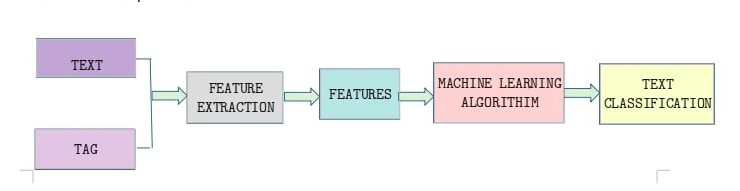

### Here we have various text material where we are trying to find those words for which we can classify the mail as a spam mail or not.
### And we do this by First, we extract the features we want from our source text (and any tags or metadata it came with), and then we feed our cleaned data into a machine learning algorithm that do the classification for us.</font>

## Data Cleaning/Data Per-processing

## 1. Tokenization 

### we’ll create a spacy_tokenizer() function that accepts a sentence as input and processes the sentence into tokens, performing lemmatization, lowercasing, and removing stop words.

In [ ]:

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

### This class overrides the transform, fit and get_parrams methods. We’ll also create a clean_text() function that removes spaces and converts text into lowercase.

In [ ]:
# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

In [ ]:
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))

In [ ]:
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)

## Creating a Pipeline and Generating the Model using Count vectorization
### Now that we’re all set up, it’s time to actually build our model! We’ll start by importing the LogisticRegression module and creating a LogisticRegression classifier object.

### Then, we’ll create a pipeline with three components: a cleaner, a vectorizer, and a classifier. The cleaner uses our predictors class object to clean and preprocess the text. The vectorizer uses countvector objects to create the bag of words matrix for our text. The classifier is an object that performs the logistic regression to classify whether the mail is spam or not.

In [ ]:
from sklearn.model_selection import train_test_split

X = data['text'] # the features we want to analyze
ylabels = data['spam'] # the labels, or answers, we want to test against

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3)

In [ ]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', classifier)])

# model generation
pipe.fit(X_train,y_train)

In [ ]:
from sklearn import metrics
# Predicting with a test dataset
predicted = pipe.predict(X_test)

# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))

## Creating a Pipeline and Generating the Model using tfidf vectorization

In [ ]:
# Create pipeline using Bag of Words
pipe2 = Pipeline([("cleaner", predictors()),
                 ('vectorizer', tfidf_vector),
                 ('classifier', classifier)])

# model generation
pipe2.fit(X_train,y_train)
# Predicting with a test dataset
predicted2 = pipe.predict(X_test)

# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted2))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted2))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted2))

# Conclusion :- 
### The results are good and I am happy with the Recall score that I got 98%. This means that the spam mails are getting identified correctly even after there being a bias towards not smap mails in the dataset. 
### Thank You for reviewing the notebook. Comment and UpVote if it helped you in any way. 🙏😃